<h1>Fashion-MNIST Project </h1>

<h2>Table of Contents</h2>

<p>Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Dataset Class</li>
<li><a href="#Train">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

 

</ul>

<hr>

# IMPORTS

In [61]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

torch.manual_seed(0)

In [62]:

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

In [63]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

##  Creating a Dataset Class


<ol>
    <li>using the transforms object to<code> Resize </code> to resize the image.</li>
    <li>using the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

In [64]:
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()  #
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

<hr>

Creating two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>.

In [65]:
dataset_train = dsets.FashionMNIST(root='Fashion MNIST/data', train=True, transform=composed, download=True)

In [66]:
dataset_val = dsets.FashionMNIST(root='Fashion MNIST/vali', train=False, transform=composed, download=True)

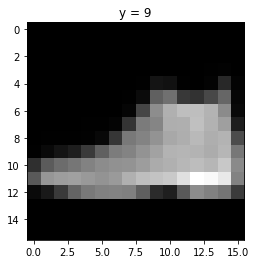

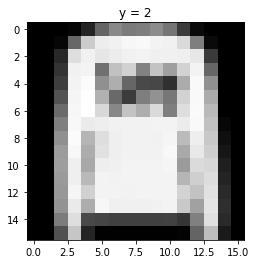

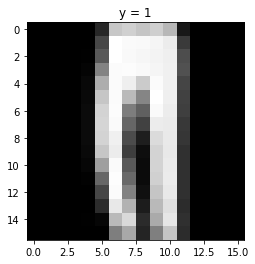

In [67]:
for n, data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n == 2:
        break


### A Convolutional Neural Network class using two constructors one with batch normalization and one without batch normalization

Constructor  using Batch Norm 

In [68]:
class CNN_batch(nn.Module):
    # Contructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

In [69]:
class CNN(nn.Module):

    # Contructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [70]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

Convolutional Neural Network object 

In [71]:
model = CNN(out_1=16, out_2=32, number_of_classes=10)
model_batch = CNN_batch(out_1=16, out_2=32, number_of_classes=10)

Creating the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. The optimizer using SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss

In [72]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer_batch = torch.optim.SGD(model_batch.parameters(), lr=learning_rate)


Function for Training the model

In [73]:
def train_model(model, train_loader, validation_loader, optimizer, n_epochs=4):
    #global variable
    N_test = len(dataset_val)
    accuracy_list = []
    loss_list = []
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct = 0
        #perform a prediction on the validation  data
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

    return accuracy_list, loss_list


# Training Models

In [74]:
accuracy_list, cost_list = train_model(model, train_loader, test_loader, optimizer)
accuracy_list_batch, cost_list_batch = train_model(model_batch, train_loader, test_loader, optimizer_batch)

Code to plot the Cost and accuracy for each epoch for the training and testing data.

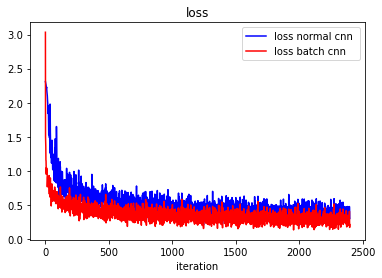

In [77]:
plt.plot(cost_list, 'b', label='cost normal cnn ')
plt.plot(cost_list_batch, 'r', label='cost batch cnn')
plt.xlabel('iteration')
plt.title("cost")
plt.legend()

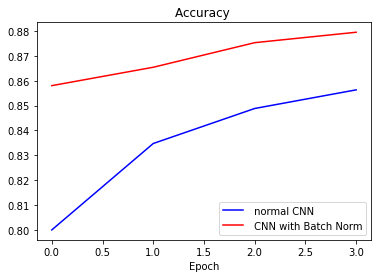

In [78]:
plt.plot(accuracy_list, 'b', label=' normal CNN')
plt.plot(accuracy_list_batch, 'r', label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()